#### Linear regression and logistic regression are two of the most widely used statistical models. They act like master keys, unlocking the secrets hidden in your data. In this notebook, i'll use the skills needed to fit simple linear and logistic regressions. Through hands-on projects, i’ll explore the relationships between variables in real-world datasets, including motor insurance claims, Taiwan house prices, fish sizes, and more. By the end of this NoteBook, i’ll be able to make predictions from data, quantify model performance, and diagnose problems with model fit.

##### we will learn the basics of this popular statistical model, what regression is, and how linear and logistic regressions differ. we will then learn how to fit simple linear regression models with numeric and categorical explanatory variables, and how to describe the relationship between the response and explanatory variables using model coefficients.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taiwan_real_estate = pd.read_csv("/content/taiwan_real_estate2.csv")
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


#### Visualizing two numeric variables
Before i can run any statistical models, it's usually a good idea to visualize the dataset. Here, i'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing point

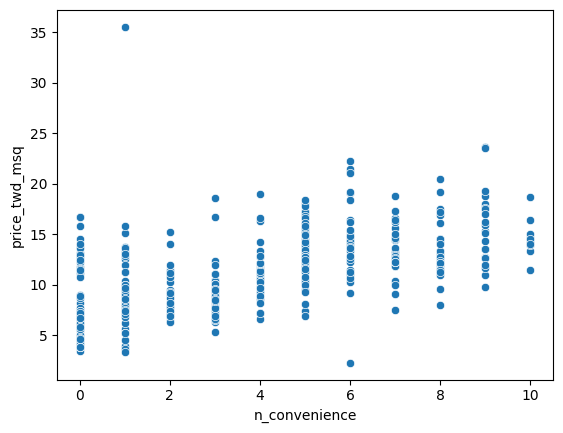

In [3]:
# Draw the scatter plot
sns.scatterplot(y="price_twd_msq", x="n_convenience", data=taiwan_real_estate)

# Show the plot
plt.show()

##### Draw a trend line calculated using linear regression. Omit the confidence interval ribbon. Note: The scatter_kws argument, pre-filled in the exercise, makes the data points 50% transparent.

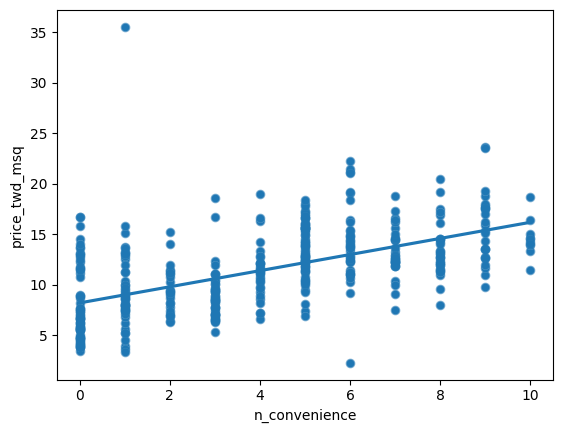

In [4]:
# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

##### Two of the most important aspects of LinearRegression models is the coefficients, which is the intercept and the slope and the y value
##### As defined below

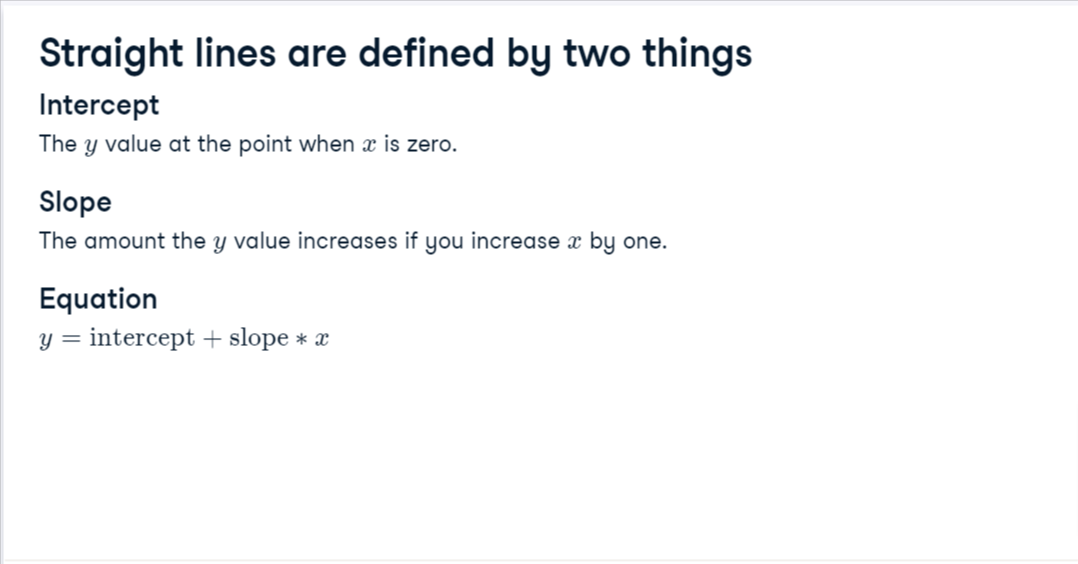

##### The picture below shows ways to estimate the slope and the intercept of a regression.

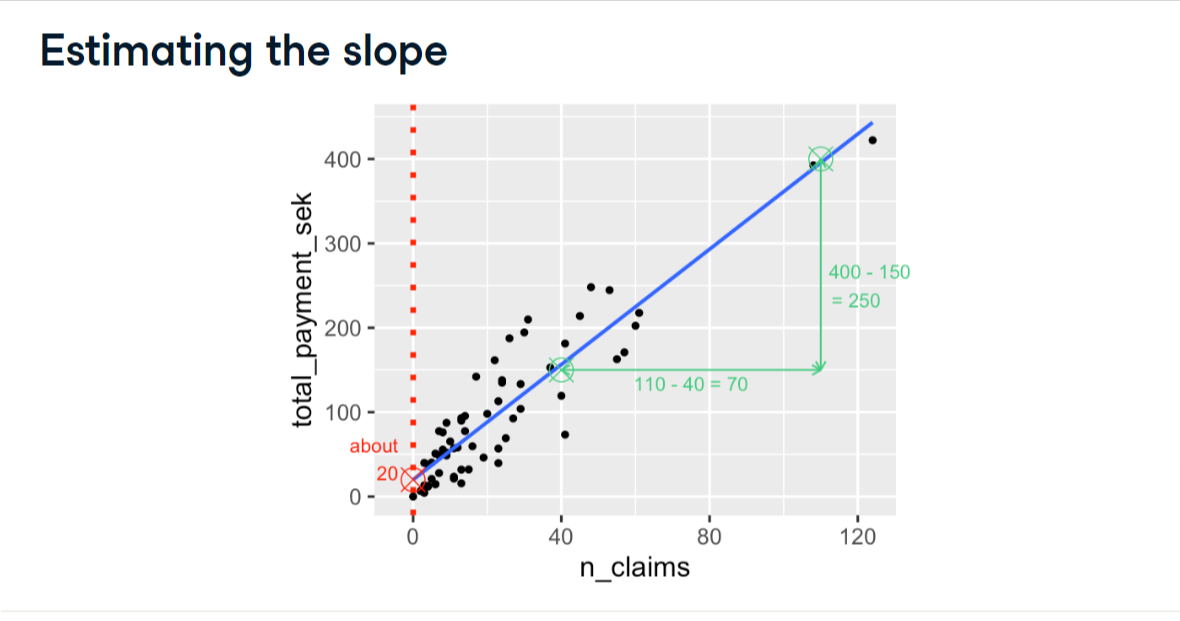

##### Linear regression with ols()
##### While sns.regplot() can display a linear regression trend line, it doesn't give us access to the intercept and slope as variables, or allow us to work with the model results as variables. That means that sometimes i'll need to run a linear regression myself. Time to run our first model!
##### taiwan_real_estate is available. TWD is an abbreviation for Taiwan dollars.

In [5]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


##### Visualizing numeric vs. categorical
If the explanatory variable is categorical, the scatter plot that i used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

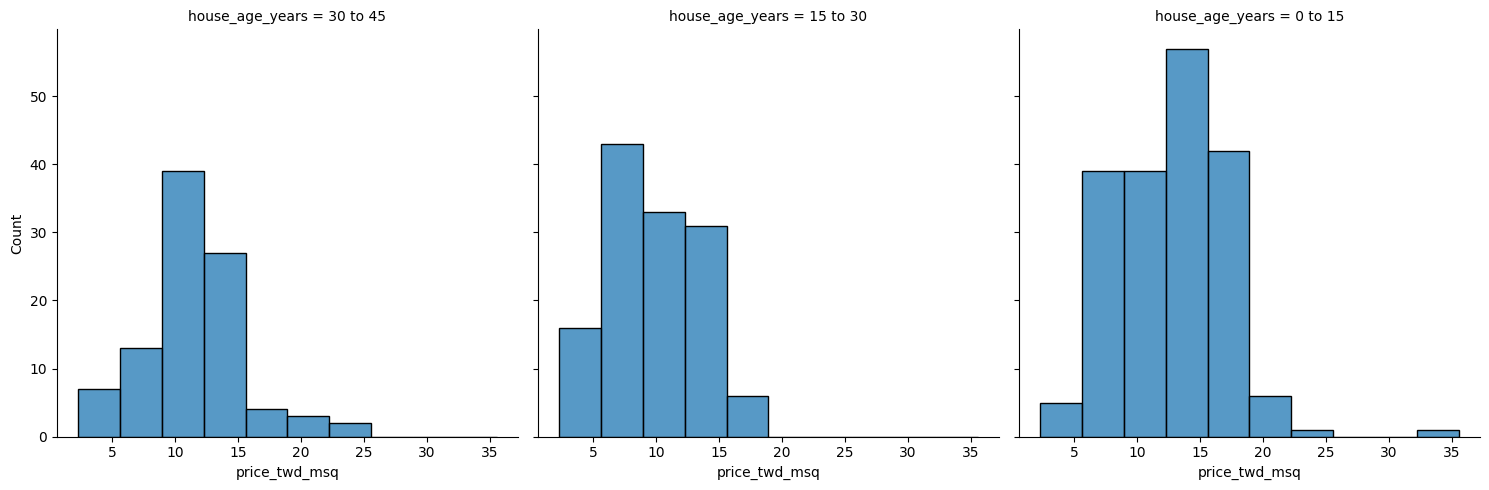

In [6]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x="price_twd_msq",
         col="house_age_years",
         bins=10)

# Show the plot
plt.show()

##### Calculating means by category
A good way to explore categorical variables further is to calculate summary statistics for each category. For example, we can calculate the mean and median of our response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, we'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help us understand the output of a linear regression with a categorical variable.

In [7]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


#### Linear regression with a categorical explanatory variable
#####To run a linear regression model with categorical explanatory variables, i can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here i'll run a linear regression on the Taiwan real estate dataset.

In [8]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


##### Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0.

In [9]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


##### The coefficients of the model are just the means of each category i calculated previously.

#### Predictions and model objects
##### Predicting house prices
Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

```
explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
```
Here, i'll make predictions for the house prices in the Taiwan real estate dataset.

In [10]:
# Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience, takes the integer values from zero to ten.
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [11]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [12]:
# Create prediction_data dataframe
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


#### **Visualizing predictions**
The prediction DataFrame i created contains a column of explanatory variable values and a column of response variable values. That means i can plot it on the same scatter plot of response versus explanatory data values.

prediction_data is available. The code for the plot i created using sns.regplot()

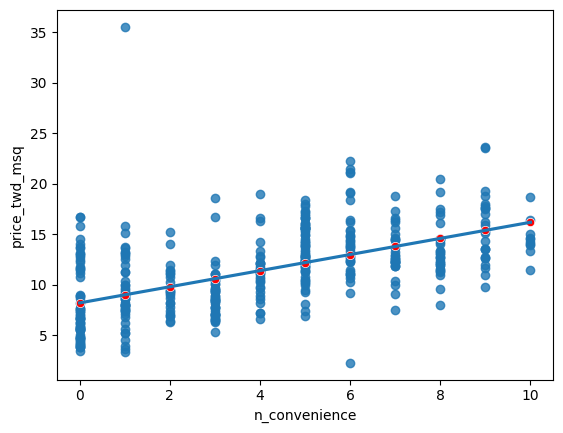

In [13]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                color="red")

# Show the layered plot
plt.show()

##### **The limits of prediction**
I made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, i will try some impossible situations.

In [17]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience" : [-1, 2.5]})

pred_impossible_data = impossible.assign(n_convenience = mdl_price_vs_conv.predict(impossible))

print(pred_impossible_data)

   n_convenience
0       7.426158
1      10.219437


##### *The model successfully gives predictions that are impossible in real life. There is no -1 or 2.5 number of convenience stores*

#### **Extracting model elements**
The model object created by ols() contains many elements. In order to perform further analysis on the model results, we need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

In [22]:
# Print the model parameters of mdl_price_vs_conv which are the coefficients intercept and slope
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [23]:
# Print the fitted values of mdl_price_vs_conv which are predictions on the original dataset used to create the model.
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [24]:
# Print the residuals of mdl_price_vs_conv which are a measure of inaccuracy in the model fit. x_respone - y_response
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [21]:
# Print a summary of mdl_price_vs_conv shows a more extended printout of the details of the model.
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           3.41e-37
Time:                        23:03:16   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

#### **Manually predicting house prices**
We can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure ourselves that predictions aren't magic - they are simply arithmetic.

```
response = intercept + slope * explanatory
```

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

In [25]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


#### **Regression to the mean**
We already saw that each response value in our dataset is equal to the sum of a fitted value, that is, the prediction by the model, and a residual, which is how much the model missed by. Loosely speaking, these two values are the parts of the response that we've explained why it has that value, and the parts we couldn't explain with our model. There are two possibilities for why we have a residual. Firstly, it could just be because our model isn't great. Particularly in the case of simple linear regression where you only have one explanatory variable, there is often room for improvement. However, it usually isn't possible or desirable to have a perfect model because the world contains a lot of randomness, and our model shouldn't capture that. In particular, extreme responses are often due to randomness or luck. That means that extremes don't persist over time, because eventually the luck runs out. This is the concept of *regression to the mean*. Eventually, extreme cases will look more like average cases.

Let's look at and example of *regression to the mean* using sport and finance data.

##### **Plotting consecutive portfolio returns**
Regression to the mean is also an important concept in investing. Here we'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

In [26]:
sp500_yearly_returns = pd.read_csv("/content/sp500_yearly_returns.csv")
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


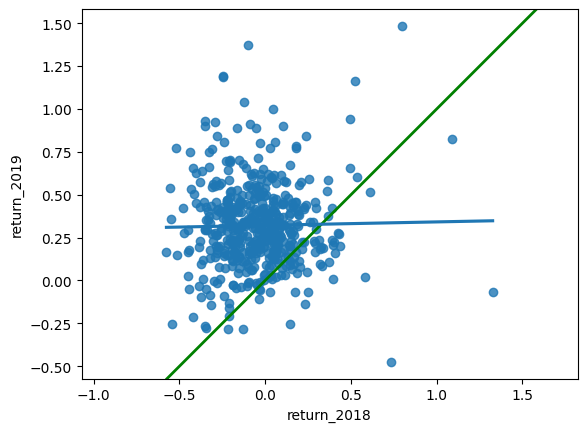

In [27]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",
                y="return_2019",
                data=sp500_yearly_returns,
                ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

##### *The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."*

##### **Modeling consecutive returns**
Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

In [28]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [29]:
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1
explanatory_data = pd.DataFrame({"return_2018":[-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


###### Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

### **Transforming the explanatory variable**
If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, we'll look at transforming the explanatory variable.

We'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. We'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

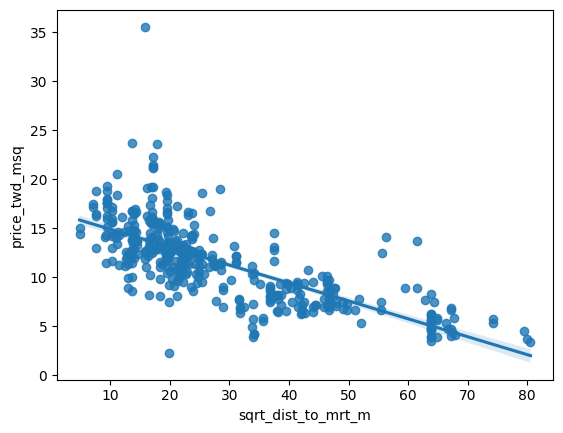

In [30]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m",
            y="price_twd_msq",
            data=taiwan_real_estate
            )
plt.show()

In [31]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [32]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

In [34]:
# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(explanatory_data.head())

   sqrt_dist_to_mrt_m  dist_to_mrt_m
0                 0.0              0
1                10.0            100
2                20.0            400
3                30.0            900
4                40.0           1600


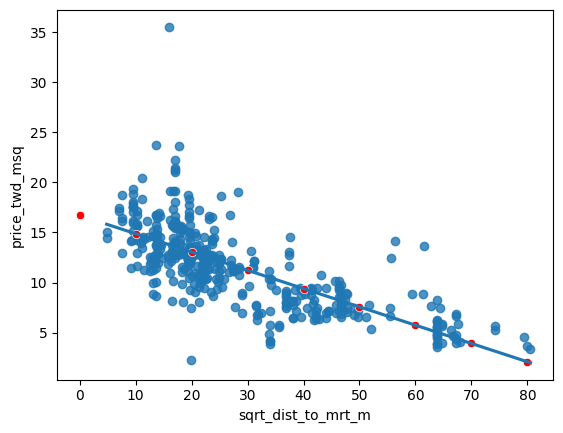

In [35]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

##### **Transforming the response variable too**
The response variable can be transformed too, but this means i will need an extra step at the end to undo that transformation. That is, we "back transform" the predictions.

I saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

In [38]:
ad_conversion = pd.read_csv("/content/ad_conversion.csv")
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


1. Create a qdrt_n_impressions column using n_impressions raised to the power of 0.25.
2. Create a qdrt_n_clicks column using n_clicks raised to the power of 0.25.
3. Create a regression plot using the transformed variables. Do the points track the line more closely?

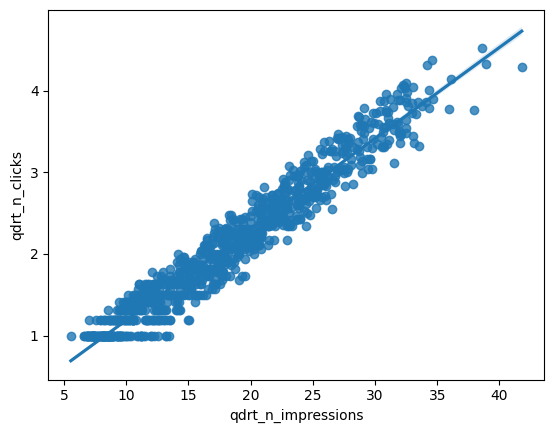

In [39]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion)
plt.show()

##### Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions using ad_conversion and assign it to mdl_click_vs_impression.

In [40]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [42]:
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data.head())

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


##### Back transformation
Previously, we transformed the response variable, ran a regression, and made predictions. But we're not done yet! In order to correctly interpret and visualize your predictions, we'll need to do a back-transformation.

In [44]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data.head())

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159


##### Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.

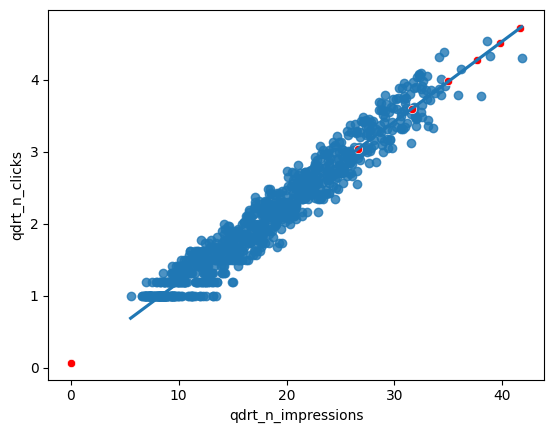

In [45]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red")
plt.show()

## Assessing model fit

**Coefficient of determination**

The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, i'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: mdl_click_vs_impression_orig models n_clicks versus n_impressions. mdl_click_vs_impression_trans is the transformed model you saw in Chapter 2. It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.

##### Print the summary of mdl_click_vs_impression_orig.

In [47]:
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()
print(mdl_click_vs_impression_orig.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:56:25   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

##### Do the same for mdl_click_vs_impression_trans.

In [49]:
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:57:53   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

##### Print the coefficient of determination for mdl_click_vs_impression_orig.

In [50]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

0.8916134973508041


##### the same for mdl_click_vs_impression_trans.

In [51]:
# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.9445272817143905


##### mdl_click_vs_impression_orig has a coefficient of determination of 0.89. Which means the number of impressions explains 89% of the variability in the number of clicks.
The transformed model performed better.

#### **Residual standard error**

Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

Again, we'll look at the models from the advertising pipeline, mdl_click_vs_impression_orig and mdl_click_vs_impression_trans.

In [52]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


##### mdl_click_vs_impression_orig has an RSE of about 20. Which means the typical difference between observed number of clicks and predicted number of clicks is 20.

##### mdl_click_vs_impression_trans has more accurate predictions since it is closer to zero.

### **Drawing diagnostic plots**
It's time to draw these diagnostic plots using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

Several plots can quantify the performance of a model. We'll look at these plots and their interpretation first.

If a linear regression model is a good fit, then the residuals are approximately normally distributed, with mean zero.

##### Residuals vs. fitted plot
The first diagnostic plot is of residuals versus fitted values. The blue line is a LOWESS trend line, which is a smooth curve following the data. These aren't good for making predictions but are useful for visualizing trends. If residuals met the assumption that they are normally distributed with mean zero, then the trend line should closely follow the y equals zero line on the plot.

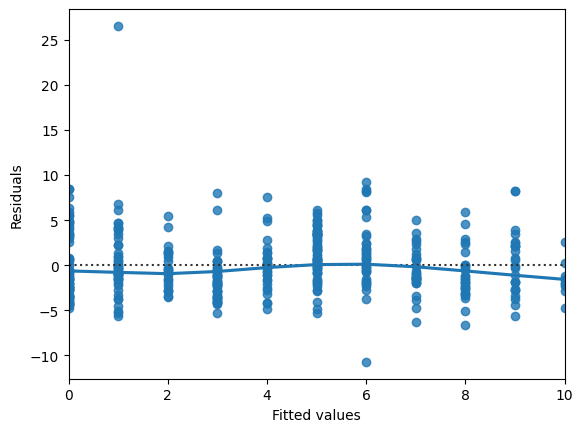

In [53]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

##### Q-Q Plot
The second diagnostic plot is called a Q-Q plot. It shows whether or not the residuals follow a normal distribution. On the x-axis, the points are quantiles from the normal distribution. On the y-axis, you get the sample quantiles, which are the quantiles derived from your dataset. It sounds technical, but interpreting this plot is straightforward. If the points track along the straight line, they are normally distributed. If not, they aren't.

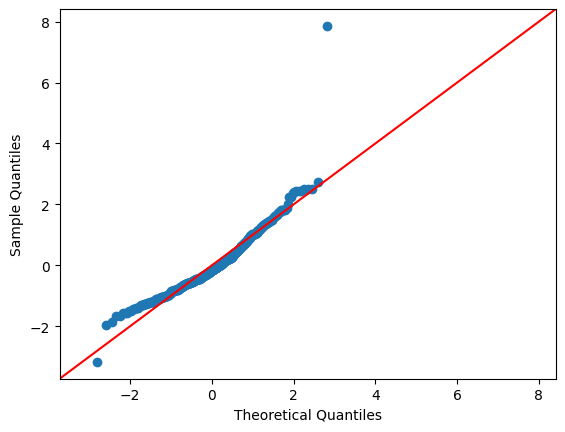

In [54]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

#####Scale-location plot
The third plot shows the square root of the standardized residuals versus the fitted values. It's often called a scale-location plot, because that's easier to say. Where the first plot showed whether or not the residuals go positive or negative as the fitted values change, this plot shows whether the size of the residuals gets bigger or smaller.

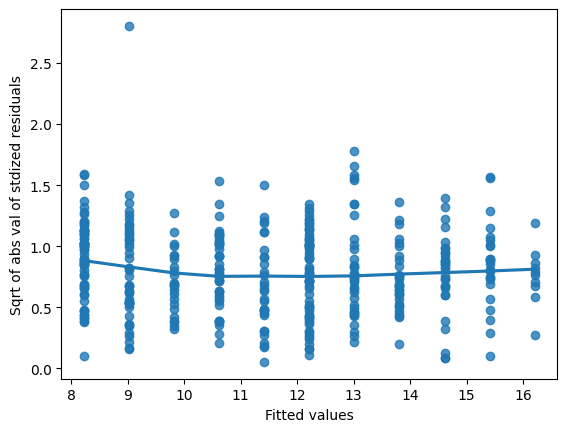

In [55]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

###### *These three diagnostic plots are excellent for sanity-checking the quality of your models.*

### **Outliers, leverage, and influence**

#### Leverage

measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

Here, we'll look at highly leveraged values in the model of house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high leverage, then move the slider to find out.

-> Observations with a large distance to the nearest MRT station have the highest leverage, because most of the observations have a short distance, so long distances are more extreme.

#### Influence
Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

You can see the same model as last time: house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high influence, then move the slider to find out.

-> Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.

#### Extracting leverage and influence
Previously, we explored which observations had the highest leverage and influence. Now we'll extract those values from the model.

In [58]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  


##### *Leverage and influence are important concepts for determining whether your model is overly affected by some unusual data points.*

### Logistic Regression
##### logistic regression models, which are a type of generalized linear model, used when the response variable is logical. Whereas linear models result in predictions that follow a straight line, logistic models result in predictions that follow a logistic curve, which is S-shaped.
To run a logistic regression, you need a new function from statsmodels. From the same statsmodels dot formula dot api package, import the logit function. This function begins the process of fitting a logistic regression model to your data. The function name is the only difference between fitting a linear regression and a logistic regression: the formula and data argument remain the same, and you use the dot fit method to fit the model. As before, you get two coefficients, one for the intercept and one for the numerical explanatory variable. The interpretation is a little different;

In [59]:
churn = pd.read_csv("/content/churn.csv")
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


##### Exploring the explanatory variables
When the response variable is logical, all the points lie on the
 and
 lines, making it difficult to see what is happening. until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

##### plot time_since_last_purchase as two histograms, split for each has_churned value.

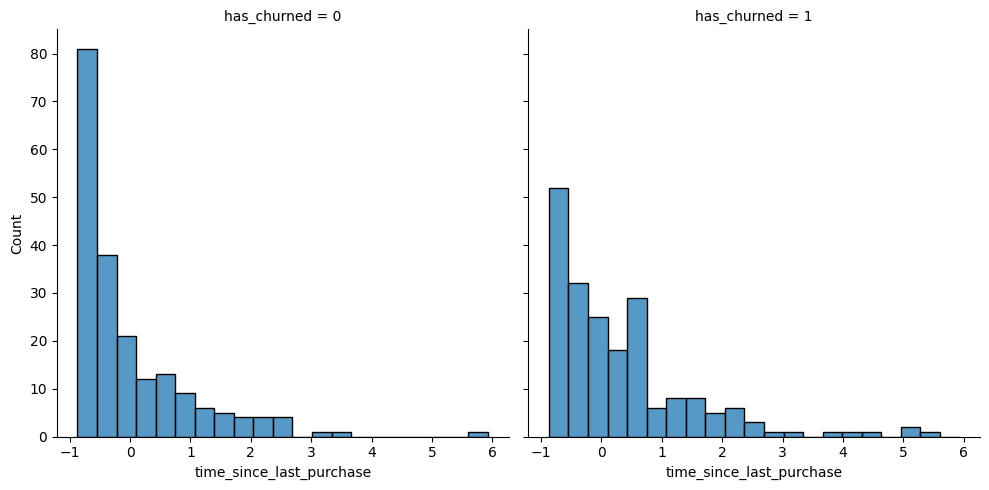

In [60]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x="time_since_last_purchase", data=churn, col="has_churned")

plt.show()

##### Redraw the histograms using the time_since_first_purchase column, split for each has_churned value.

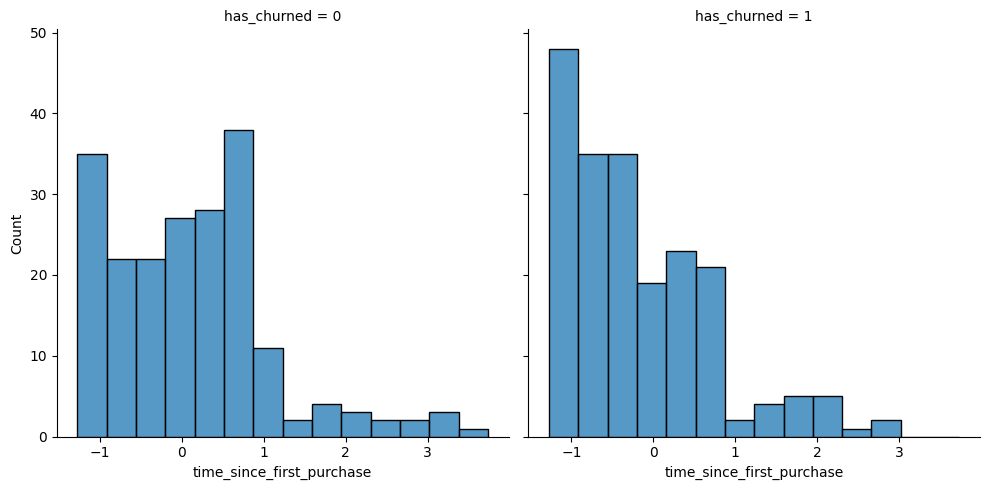

In [61]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x="time_since_first_purchase", data=churn, col="has_churned")

plt.show()

##### Visualizing linear and logistic models
As with linear regressions, regplot() will draw model predictions for a logistic regression without us having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: we should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

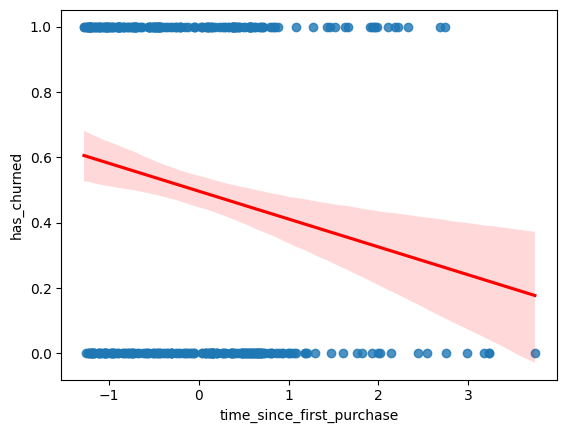

In [62]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            line_kws={"color": "red"})

plt.show()

##### Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a blue logistic regression trend line (without a standard error ribbon).

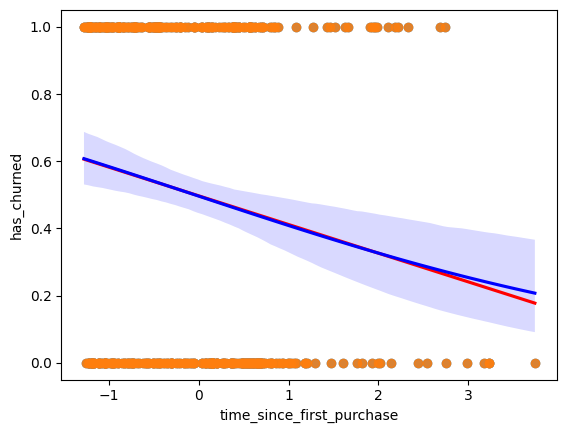

In [63]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            logistic=True,
            line_kws={"color":"blue"})

plt.show()

##### The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

###########################################################################

#### Logistic regression with logit()
Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. You then use .fit() to fit the model to the data.

Here, we'll model how the length of relationship with a customer affects churn.

In [64]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


#### Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next couple of examples. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, we'll calculate and visualize these probabilities.

In [70]:
explanatory_data = pd.DataFrame({"time_since_first_purchase":np.arange(-1, 6.25, 0.25)})

In [71]:
# Create a DataFrame, prediction_data, by assigning a column has_churned to explanatory_data.
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.00     0.584096
1                      -0.75     0.562401
2                      -0.50     0.540465
3                      -0.25     0.518370
4                       0.00     0.496204


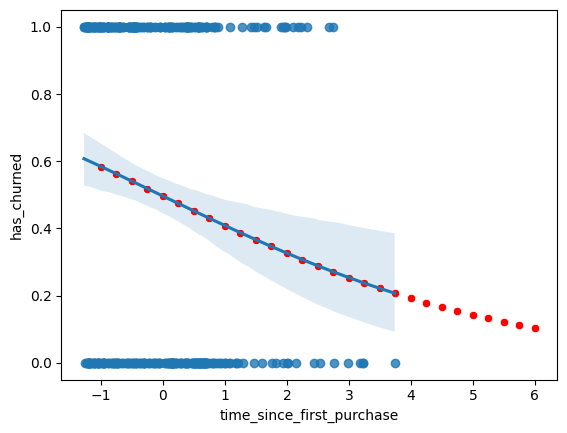

In [73]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
            y="has_churned",
            data=prediction_data,
            color="red")

plt.show()

#### Most likely outcome
When explaining our results to a non-technical audience, we may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

In [74]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.00     0.584096                  1.0
1                      -0.75     0.562401                  1.0
2                      -0.50     0.540465                  1.0
3                      -0.25     0.518370                  1.0
4                       0.00     0.496204                  0.0


##### The most likely outcome is that you will master logistic regression! Providing the most likely response is a great way to share the model results with a non-technical audience.

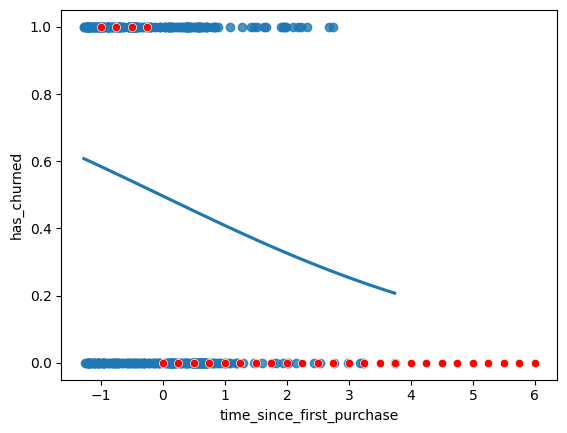

In [75]:
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

plt.show()

##### Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when we want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

In [76]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.00     0.584096                  1.0    1.404400
1                      -0.75     0.562401                  1.0    1.285197
2                      -0.50     0.540465                  1.0    1.176111
3                      -0.25     0.518370                  1.0    1.076284
4                       0.00     0.496204                  0.0    0.984930


##### Odds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses.

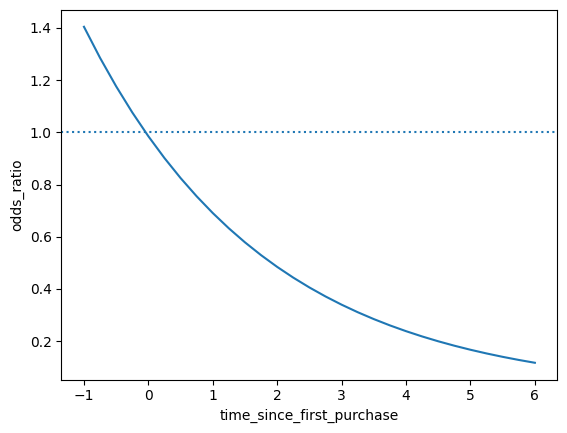

In [77]:
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase", y="odds_ratio", data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

##### Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

In [78]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.00     0.584096                  1.0    1.404400   
1                      -0.75     0.562401                  1.0    1.285197   
2                      -0.50     0.540465                  1.0    1.176111   
3                      -0.25     0.518370                  1.0    1.076284   
4                       0.00     0.496204                  0.0    0.984930   

   log_odds_ratio  
0        0.339610  
1        0.250912  
2        0.162213  
3        0.073514  
4       -0.015185  


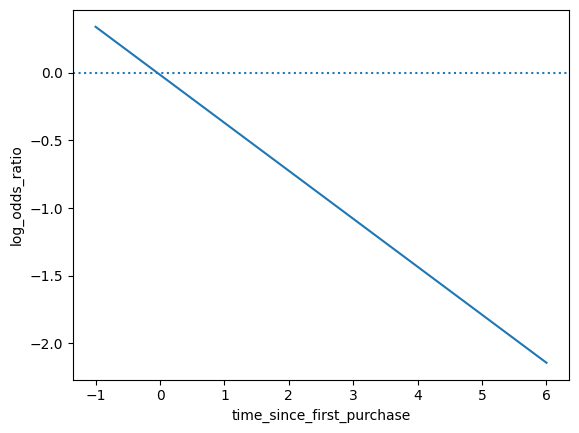

In [79]:
fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

#### Quantifying logistic regression fit

#### Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

- True positive: The customer churned and the model predicted they would.
- False positive: The customer didn't churn, but the model predicted they would.
- True negative: The customer didn't churn and the model predicted they wouldn't.
- False negative: The customer churned, but the model predicted they wouldn't.
churn and mdl_churn_vs_relationship are available.

In [82]:
# This is how you obtain the confusion matrix manually
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response":actual_response,
                         "predicted_response":predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


[[112.  88.]
 [ 76. 124.]]


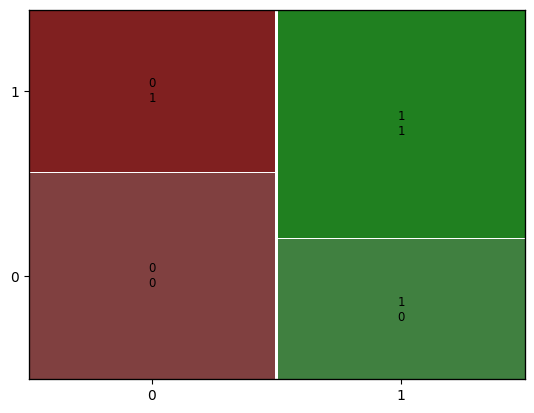

In [83]:
# different approach using pred_table method
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

##### Measuring logistic model performance
As we know by now, several metrics exist for measuring the performance of a logistic regression model. In this last example, we'll manually calculate accuracy, sensitivity, and specificity. Recall the following definitions:

Accuracy is the proportion of predictions that are correct.

```
accuracy = {TN + TP} / {TN + FN + FP + TP}
```

Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.

```
sensitivity = {TP} / {TP + FN}
```

Specificity is the proportion of false observations that are correctly predicted by the model as being false.

```
specificity = {TN} / {TN + FP}
```






In [84]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TP + TN) / (TP + TN + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56


## Conclusion:
- We saw how to fit a simple linear regression with both a numeric and a categorical explanatory variable, and how to interpret the model coefficients.
- The we learned how to make predictions with a linear regression model, how to work with model objects, what regression to the mean means, and how to transform model variables.
- Then we saw how to quantify and visualize model fit, and learned about outliers, leverage, and influence of observations.
- We also fitted a simple logistic regression model, calculated its predictions in several different ways, and calculated performance metrics using a confusion matrix.